In [86]:
import numpy as np
import random as random
%run project1.py
%run utils.py

In [2]:
def get_order(n_samples):
    try:
        with open(str(n_samples) + '.txt') as fp:
            line = fp.readline()
            return list(map(int, line.split(',')))
    except FileNotFoundError:
        random.seed(1)
        indices = list(range(n_samples))
        random.shuffle(indices)
        return indices


In [3]:
def perceptron_single_step_update(
        feature_vector,
        label,
        current_theta,
        current_theta_0):
    """
    Properly updates the classification parameter, theta and theta_0, on a
    single step of the perceptron algorithm.

    Args:
        feature_vector - A numpy array describing a single data point.
        label - The correct classification of the feature vector.
        current_theta - The current theta being used by the perceptron
            algorithm before this update.
        current_theta_0 - The current theta_0 being used by the perceptron
            algorithm before this update.

    Returns: A tuple where the first element is a numpy array with the value of
    theta after the current update has completed and the second element is a
    real valued number with the value of theta_0 after the current updated has
    completed.
    """
    # Your code here
    # Your code here
    theta=current_theta
    theta_0=current_theta_0
    
    for i in range(len(feature_vector)):
        if(label*(np.dot(feature_vector,theta)+theta_0))<=0:
            theta=theta+label*feature_vector
            theta_0=theta_0+label
    
    return theta,theta_0

    raise NotImplementedError


In [4]:
feature_vector = np.array([[-1.0,-1.0],[1.0,0.0],[-1.0,1.5]])
label=[1,-1,1] 
theta, theta_0 = np.array([1, 0]), 0
for i in get_order(feature_vector.shape[0]):
    #print(feature_vector[i],label[i], theta, theta_0)
    theta,theta_0=perceptron_single_step_update(feature_vector[i],label[i], theta, theta_0)
    #print(theta,theta_0)

In [67]:
label[2]

1

In [45]:
def perceptron(feature_matrix, labels, T):
    """
    Runs the full perceptron algorithm on a given set of data. Runs T
    iterations through the data set, there is no need to worry about
    stopping early.

    NOTE: Please use the previously implemented functions when applicable.
    Do not copy paste code from previous parts.

    NOTE: Iterate the data matrix by the orders returned by get_order(feature_matrix.shape[0])

    Args:
        feature_matrix -  A numpy matrix describing the given data. Each row
            represents a single data point.
        labels - A numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix.
        T - An integer indicating how many times the perceptron algorithm
            should iterate through the feature matrix.

    Returns: A tuple where the first element is a numpy array with the value of
    theta, the linear classification parameter, after T iterations through the
    feature matrix and the second element is a real number with the value of
    theta_0, the offset classification parameter, after T iterations through
    the feature matrix.
    """
    # Your code here
    theta, theta_0 = np.zeros([feature_matrix.shape[1], ]) , 0
    for t in range(T):
        for i in get_order(feature_matrix.shape[0]):
            # Your code here
            theta,theta_0=perceptron_single_step_update(feature_matrix[i],labels[i], theta, theta_0)
            print(theta)
            pass
    return theta,theta_0
    raise NotImplementedError
#pragma: coderesponse end


In [113]:
feature_vector = np.array([[0.43656612, 0.45255625,0.44126528,-0.020369,-0.26751538,-0.3485387,-0.12948061,-0.38868465,0.09924607,-0.06034136]
,[0.33621946,-0.2419108,0.46686034,-0.2719666,-0.16128587,-0.25837492,-0.47430613,0.22124981,0.31309007,0.12527668]
,[-0.38009215,0.08079212,-0.0081383,0.3676452,-0.32473046,-0.11152051,-0.2482996,0.27945158,-0.24801126,-0.41611591]
,[-0.21297863,-0.49807752,0.33723268,-0.13171367,-0.47829887,-0.34968492,0.42546236,-0.37826223,-0.27111502,-0.18390236]
,[-0.07334479,-0.08818135,0.11916652,-0.01997256,-0.34072733,0.45347703,-0.1972767,-0.1098405,-0.49201327,0.00069026]])
label=[-1,  1,  1,  1, -1]

In [126]:

theta,theta_0=perceptron(feature_vector,label,T)
print(theta,theta_0)

[-0.95382188 -1.46088333  0.01464664  0.16029921  0.10688122 -1.75282947
 -0.16895778  1.73003135  1.13659027 -0.64696888] 0


<h1>Avaraging the theta and theta_0

In [6]:
def average_perceptron(feature_matrix, labels, T):
    """
    Runs the average perceptron algorithm on a given set of data. Runs T
    iterations through the data set, there is no need to worry about
    stopping early.

    NOTE: Please use the previously implemented functions when applicable.
    Do not copy paste code from previous parts.

    NOTE: Iterate the data matrix by the orders returned by get_order(feature_matrix.shape[0])


    Args:
        feature_matrix -  A numpy matrix describing the given data. Each row
            represents a single data point.
        labels - A numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix.
        T - An integer indicating how many times the perceptron algorithm
            should iterate through the feature matrix.

    Returns: A tuple where the first element is a numpy array with the value of
    the average theta, the linear classification parameter, found after T
    iterations through the feature matrix and the second element is a real
    number with the value of the average theta_0, the offset classification
    parameter, found after T iterations through the feature matrix.

    Hint: It is difficult to keep a running average; however, it is simple to
    find a sum and divide.
    """
    # Your code here
    theta, theta_0 = np.zeros([feature_matrix.shape[1], ]) , 0
    theta_sum=theta
    theta_0_sum=theta_0
    for t in range(T):
        for i in get_order(feature_matrix.shape[0]):
            # Your code here
            theta,theta_0=perceptron_single_step_update(feature_matrix[i],labels[i], theta, theta_0)
            theta_sum=theta_sum+theta
            theta_0_sum=theta_0_sum+theta_0
            pass
    return theta_sum/feature_matrix.shape[0],theta_0_sum/feature_matrix.shape[0]

    raise NotImplementedError


In [84]:
def average_perceptron(feature_matrix, labels, T):
    """
    Runs the average perceptron algorithm on a given set of data. Runs T
    iterations through the data set, there is no need to worry about
    stopping early.

    NOTE: Please use the previously implemented functions when applicable.
    Do not copy paste code from previous parts.

    NOTE: Iterate the data matrix by the orders returned by get_order(feature_matrix.shape[0])


    Args:
        feature_matrix -  A numpy matrix describing the given data. Each row
            represents a single data point.
        labels - A numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix.
        T - An integer indicating how many times the perceptron algorithm
            should iterate through the feature matrix.

    Returns: A tuple where the first element is a numpy array with the value of
    the average theta, the linear classification parameter, found after T
    iterations through the feature matrix and the second element is a real
    number with the value of the average theta_0, the offset classification
    parameter, found after T iterations through the feature matrix.

    Hint: It is difficult to keep a running average; however, it is simple to
    find a sum and divide.
    """
    # Your code here

    theta, theta_0 = np.zeros([feature_matrix.shape[1], ]) , 0
    theta_sum=theta
    theta_0_sum=theta_0
    for t in range(T):
        for i in get_order(feature_matrix.shape[0]):
            # Your code here
            theta,theta_0=perceptron_single_step_update(feature_matrix[i],labels[i], theta, theta_0)
            
            theta_sum=theta_sum+theta
            theta_0_sum=theta_0_sum+theta_0
            print(t,theta,theta_sum)
            pass
        
    return theta_sum/(feature_matrix.shape[0]*T),theta_0_sum/(feature_matrix.shape[0]*T)
    raise NotImplementedError


In [51]:
feature_matrix = np.array([[-0.40297268,-0.19226411,-0.31382522,-0.21030247,0.35251424,0.01958424,-0.23737078,0.00609574,0.3438878,-0.13395244]
,[-0.19174761,-0.18935839,0.2044263,-0.00694845,0.29351723,0.02065068,0.45106051,-0.04004102,-0.1664399,0.20832494]
,[0.43028211,-0.08103597,-0.0031553,0.0688641,0.17336835,-0.36944313,-0.28619901,0.20520901,-0.32716225,0.20029608]
,[-0.24975303,-0.40499674,0.07214761,-0.26178923,0.39585722,0.39437886,0.38025943,-0.4736509,-0.19526073,0.31692791]
,[-0.17286961,-0.3418627,0.38123633,-0.39330173,0.24654077,0.1146881,0.1855213,-0.02751078,0.37056209,0.3653858,]])
labels = np.array([-1,  1, -1,  1, -1])
T = 5

In [1]:
#average_perceptron(feature_matrix, labels, T)
#feature_matrix[1]

In [66]:
feature_matrix1=np.array(feature_matrix[0])
labels1=1


In [2]:
#perceptron(feature_matrix, labels, 5)

In [63]:
np.array(feature_matrix[0])

array([-0.40297268, -0.19226411, -0.31382522, -0.21030247,  0.35251424,
        0.01958424, -0.23737078,  0.00609574,  0.3438878 , -0.13395244])

In [65]:
feature_matrix

array([[-0.40297268, -0.19226411, -0.31382522, -0.21030247,  0.35251424,
         0.01958424, -0.23737078,  0.00609574,  0.3438878 , -0.13395244],
       [-0.19174761, -0.18935839,  0.2044263 , -0.00694845,  0.29351723,
         0.02065068,  0.45106051, -0.04004102, -0.1664399 ,  0.20832494],
       [ 0.43028211, -0.08103597, -0.0031553 ,  0.0688641 ,  0.17336835,
        -0.36944313, -0.28619901,  0.20520901, -0.32716225,  0.20029608],
       [-0.24975303, -0.40499674,  0.07214761, -0.26178923,  0.39585722,
         0.39437886,  0.38025943, -0.4736509 , -0.19526073,  0.31692791],
       [-0.17286961, -0.3418627 ,  0.38123633, -0.39330173,  0.24654077,
         0.1146881 ,  0.1855213 , -0.02751078,  0.37056209,  0.3653858 ]])

In [148]:
get_order(feature_matrix.shape[0])

[2, 3, 4, 0, 1]

In [149]:
feature_matrix.shape[1]

10

In [150]:
feature_matrix.shape[0]

5

In [187]:
-3.5700777/-0.0668933

53.36973508557658

In [239]:
def perceptron(feature_matrix, labels, T):
    """
    Runs the full perceptron algorithm on a given set of data. Runs T
    iterations through the data set, there is no need to worry about
    stopping early.

    NOTE: Please use the previously implemented functions when applicable.
    Do not copy paste code from previous parts.

    NOTE: Iterate the data matrix by the orders returned by get_order(feature_matrix.shape[0])

    Args:
        feature_matrix -  A numpy matrix describing the given data. Each row
            represents a single data point.
        labels - A numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix.
        T - An integer indicating how many times the perceptron algorithm
            should iterate through the feature matrix.

    Returns: A tuple where the first element is a numpy array with the value of
    theta, the linear classification parameter, after T iterations through the
    feature matrix and the second element is a real number with the value of
    theta_0, the offset classification parameter, after T iterations through
    the feature matrix.
    """
    # Your code here
    theta, theta_0 = np.zeros([feature_matrix.shape[1], ]), 0
    for t in range(T):
        for i in get_order(feature_matrix.shape[0]):
            # Your code here
            theta,theta_0=perceptron_single_step_update(feature_matrix[i],labels[i], theta, theta_0)
            pass
    return theta,theta_0
    raise NotImplementedError


<h1>Pagasos Algorithm

In [149]:
def pegasos_single_step_update(
        feature_vector,
        label,
        L,
        eta,
        current_theta,
        current_theta_0):
    """
    Properly updates the classification parameter, theta and theta_0, on a
    single step of the Pegasos algorithm

    Args:
        feature_vector - A numpy array describing a single data point.
        label - The correct classification of the feature vector.
        L - The lamba value being used to update the parameters.
        eta - Learning rate to update parameters.
        current_theta - The current theta being used by the Pegasos
            algorithm before this update.
        current_theta_0 - The current theta_0 being used by the
            Pegasos algorithm before this update.

    Returns: A tuple where the first element is a numpy array with the value of
    theta after the current update has completed and the second element is a
    real valued number with the value of theta_0 after the current updated has
    completed.
    """
    # Your code here

    theta=current_theta
    theta_0=current_theta_0
    #for i in range(len(feature_vector)):
    if (label*(np.dot(current_theta,feature_vector)+current_theta_0))<=1:
        theta=(1-eta*L)*theta+eta*label*feature_vector
        theta_0=theta_0+eta*label
    else:
        theta=(1-eta*L)*theta
    
    return theta,theta_0
    raise NotImplementedError


In [150]:
feature_vector = np.array([1, 2])
label, theta, theta_0 = 1, np.array([-1, 1]), -1.5
L = 0.2
eta = 0.1


In [145]:
len(feature_vector)

2

In [151]:
pegasos_single_step_update(feature_vector,label,L,eta,theta,theta_0)

(array([-0.88,  1.18]), -1.4)

<h1>Pegasos Algorithm Full

In [204]:
def pegasos(feature_matrix, labels, T, L):
    """
    Runs the Pegasos algorithm on a given set of data. Runs T
    iterations through the data set, there is no need to worry about
    stopping early.

    For each update, set learning rate = 1/sqrt(t),
    where t is a counter for the number of updates performed so far (between 1
    and nT inclusive).

    NOTE: Please use the previously implemented functions when applicable.
    Do not copy paste code from previous parts.

    Args:
        feature_matrix - A numpy matrix describing the given data. Each row
            represents a single data point.
        labels - A numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix.
        T - An integer indicating how many times the algorithm
            should iterate through the feature matrix.
        L - The lamba value being used to update the Pegasos
            algorithm parameters.

    Returns: A tuple where the first element is a numpy array with the value of
    the theta, the linear classification parameter, found after T
    iterations through the feature matrix and the second element is a real
    number with the value of the theta_0, the offset classification
    parameter, found after T iterations through the feature matrix.
    """
    # Your code here
    theta, theta_0 = np.zeros([feature_matrix.shape[1], ]) , 0
    count=0
    for t in range(T):
        for i in get_order(feature_matrix.shape[0]):
            count=count+1
            eta=1/np.sqrt(count)
            theta,theta_0=pegasos_single_step_update(feature_matrix[i],labels[i],L,eta,theta,theta_0)

    return theta,theta_0
    raise NotImplementedError


In [200]:
feature_matrix = np.array([[1, 2]])
labels = np.array([1])
T = 1
L = 0.2

In [201]:
pegasos(feature_matrix,labels,T,L)

(array([1., 2.]), 1.0)

In [203]:
get_order(feature_matrix.shape[0])

[0]

In [135]:
feature_matrix.shape[0]

1

In [161]:
labels[0]

1

In [169]:
theta, theta_0 = np.zeros([feature_matrix.shape[1], ]) , 0
pegasos_single_step_update(feature_vector,labels,L,eta,theta,theta_0)

(array([0.1, 0.2]), array([0.1]))

In [168]:
theta

array([0., 0.])

In [166]:
feature_matrix.shape[1]

2

<h1> Classify

In [23]:
def classify(feature_matrix, theta, theta_0):
    
    """
    A classification function that uses theta and theta_0 to classify a set of
    data points.

    Args:
        feature_matrix - A numpy matrix describing the given data. Each row
            represents a single data point.
                theta - A numpy array describing the linear classifier.
        theta - A numpy array describing the linear classifier.
        theta_0 - A real valued number representing the offset parameter.

    Returns: A numpy array of 1s and -1s where the kth element of the array is
    the predicted classification of the kth row of the feature matrix using the
    given theta and theta_0. If a prediction is GREATER THAN zero, it should
    be considered a positive classification.
    """
    # Your code here
    predicted=[]
    for i in range(feature_matrix.shape[0]):
        if np.dot(feature_matrix[i],theta)+theta_0 >0:
            predicted.append(1)
        else:
            predicted.append(-1)
        
    
    return np.array(predicted)
    raise NotImplementedError

In [83]:
feature_matrix = np.array([[1., 1], [-1, 1], [1, 1]])
theta = np.array([1, 1])
theta_0 = 0

In [84]:
classify(feature_matrix,theta,theta_0)

array([ 1, -1,  1])

<h1> classifier accuracy

In [59]:
def classifier_accuracy(
        classifier,
        train_feature_matrix,
        val_feature_matrix,
        train_labels,
        val_labels,
        **kwargs):
    """
    Trains a linear classifier and computes accuracy.
    The classifier is trained on the train data. The classifier's
    accuracy on the train and validation data is then returned.

    Args:
        classifier - A classifier function that takes arguments
            (feature matrix, labels, **kwargs) and returns (theta, theta_0)
        train_feature_matrix - A numpy matrix describing the training
            data. Each row represents a single data point.
        val_feature_matrix - A numpy matrix describing the training
            data. Each row represents a single data point.
        train_labels - A numpy array where the kth element of the array
            is the correct classification of the kth row of the training
            feature matrix.
        val_labels - A numpy array where the kth element of the array
            is the correct classification of the kth row of the validation
            feature matrix.
        **kwargs - Additional named arguments to pass to the classifier
            (e.g. T or L)

    Returns: A tuple in which the first element is the (scalar) accuracy of the
    trained classifier on the training data and the second element is the
    accuracy of the trained classifier on the validation data.
    """
    # Your code here
    # Accuracy Training Data 
    Tr_theta,Tr_theta_0=classifier(train_feature_matrix,train_labels,**kwargs)
    Tr_clssified_based_on_prediction=classify(train_feature_matrix,Tr_theta,Tr_theta_0)
    m=train_labels
    n=Tr_clssified_based_on_prediction
    tp,tn,fn,fp=sum((m==1)&(n==1)),sum((m==0)&(n==0)),sum((m==1)&(n==0)),sum((m==0)&(n==1))
    Train_accuracy=(tp+tn)/(tp+tn+fn+fp)
    
    #Accuracy on tesst data
    val_theta,val_theta_0=classifier(val_feature_matrix,val_labels,**kwargs)
    Val_clssified_based_on_prediction=classify(val_feature_matrix,val_theta,val_theta_0)
    m=val_labels
    n=Val_clssified_based_on_prediction
    tp,tn,fn,fp=sum((m==1)&(n==1)),sum((m==0)&(n==0)),sum((m==1)&(n==0)),sum((m==0)&(n==1))
    Val_accuracy=(tp+tn)/(tp+tn+fn+fp)

    
    return Train_accuracy,Val_accuracy
    raise NotImplementedError


In [60]:
train_feature_matrix = np.array([[1, 0], [1, -1], [2, 3]])
val_feature_matrix = np.array([[1, 1], [2, -1]])
train_labels = np.array([1, -1, 1])
val_labels = np.array([-1, 1])


In [61]:
classifier_accuracy(perceptron,train_feature_matrix,val_feature_matrix,train_labels,val_labels,T=10)

(1.0, 1.0)

In [ ]:
# function calling
#Perceptron
#theta,theta_0=perceptron(feature_vector,label,T)

#Average Perceptron
##average_perceptron(feature_matrix, labels, T)

#Pegosos
#theta,theta_0=pegasos(feature_matrix,labels,T,L)

In [62]:
classifier_accuracy(average_perceptron,train_feature_matrix,val_feature_matrix,train_labels,val_labels,T=10)

(1.0, 1.0)

In [68]:
classifier_accuracy(pegasos,train_feature_matrix,val_feature_matrix,train_labels,val_labels,T=10,L=0.1)

(1.0, 1.0)

<h1> Using given accuracy function




In [67]:
def classifier_accuracy(
        classifier,
        train_feature_matrix,
        val_feature_matrix,
        train_labels,
        val_labels,
        **kwargs):
    """
    Trains a linear classifier and computes accuracy.
    The classifier is trained on the train data. The classifier's
    accuracy on the train and validation data is then returned.

    Args:
        classifier - A classifier function that takes arguments
            (feature matrix, labels, **kwargs) and returns (theta, theta_0)
        train_feature_matrix - A numpy matrix describing the training
            data. Each row represents a single data point.
        val_feature_matrix - A numpy matrix describing the training
            data. Each row represents a single data point.
        train_labels - A numpy array where the kth element of the array
            is the correct classification of the kth row of the training
            feature matrix.
        val_labels - A numpy array where the kth element of the array
            is the correct classification of the kth row of the validation
            feature matrix.
        **kwargs - Additional named arguments to pass to the classifier
            (e.g. T or L)

    Returns: A tuple in which the first element is the (scalar) accuracy of the
    trained classifier on the training data and the second element is the
    accuracy of the trained classifier on the validation data.
    """
    # Your code here
    # Accuracy Training Data 
    Tr_theta,Tr_theta_0=classifier(train_feature_matrix,train_labels,**kwargs)
    Tr_clssified_based_on_prediction=classify(train_feature_matrix,Tr_theta,Tr_theta_0)
    Train_accuracy=accuracy(Tr_clssified_based_on_prediction,train_labels)
    
    #Accuracy on tesst data
    val_theta,val_theta_0=classifier(val_feature_matrix,val_labels,**kwargs)
    Val_clssified_based_on_prediction=classify(val_feature_matrix,val_theta,val_theta_0)
    Val_accuracy=accuracy(Val_clssified_based_on_prediction,val_labels)

    
    return Train_accuracy,Val_accuracy
    raise NotImplementedError


In [66]:
accuracy(np.array([[1]]),np.array([[1]]))

1.0

In [69]:
classifier_accuracy(perceptron, train_bow_features,val_bow_features,train_labels,val_labels,T=T)

NameError: name 'train_bow_features' is not defined

theta for Perceptron is 3.8618999999956163, 4.098600000000013
theta_0 for Perceptron is -8.0


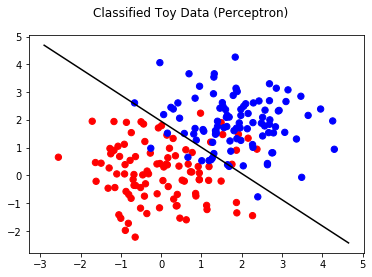

theta for Average Perceptron is 3.8533517315971957, 3.8925257442000056
theta_0 for Average Perceptron is -7.057743


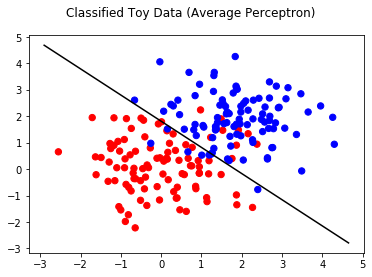

theta for Pegasos is 0.6556693929575658, 0.6009235284484606
theta_0 for Pegasos is -1.2383868172161716


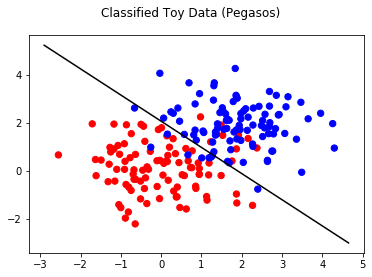

NotImplementedError: 

In [71]:
%run main.py

In [75]:



Train_accuracy,test_accuracy=classifier_accuracy(pegasos, train_bow_features,test_bow_features,train_labels,test_labels,T=25,L=0.0100)
print(Train_accuracy,test_accuracy)

0.9185 1.0


In [78]:
type(test_bow_features)

numpy.ndarray

In [80]:
print (np.finfo(np.double).precision)

15


In [81]:
np.array([1, 2]).dtype

dtype('int32')

In [82]:
np.array([1., 2]).dtype

dtype('float64')

In [87]:
x=np.array([[1,2],[3,4]])

In [88]:
x

array([[1, 2],
       [3, 4]])

In [93]:
x=x.dtype

TypeError: 'numpy.dtype' object is not callable

In [92]:
x.dtype

dtype('int32')

In [94]:
stopwords=utils.load_data("stopwords.txt")

In [96]:
import pandas as pd

In [105]:
a=pd.read_csv('stopwords.txt',sep='\n',header=None)

In [107]:
m=[x.rstrip() for x in open("stopwords.txt")]

In [113]:
type(m)


list

In [122]:
('a' in d ) &('i' in m)

True

In [121]:
d={'a':1,'b':2}